In [35]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [36]:
dados = pd.read_csv("dados/ExpVinho.csv", sep = ";",encoding= "utf-8", thousands  = ".")

In [37]:
dados.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,46
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,26,95,4,21,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,15467,87702,10794,45382,3660,25467,6261,32605,2698,6741
3,4,Angola,0,0,0,0,0,0,0,0,...,10170,61680,477,709,345,1065,0,0,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Columns: 106 entries, Id to 2021.1
dtypes: int64(105), object(1)
memory usage: 102.8+ KB


In [39]:
id_pais = dados[["Id","País"]]
id_pais.head()

,Id,País
0,1,Afeganistão
1,2,África do Sul
2,3,"Alemanha, República Democrática"
3,4,Angola
4,5,Anguilla


In [40]:
dados_15anos = dados[dados.columns[-30:]]
cols = dados_15anos.columns.str.replace(".1", "-Dolar")
dados_15anos.columns = cols
dados_15anos.head()

,2007,2007-Dolar,2008,2008-Dolar,2009,2009-Dolar,2010,2010-Dolar,2011,2011-Dolar,...,2017,2017-Dolar,2018,2018-Dolar,2019,2019-Dolar,2020,2020-Dolar,2021,2021-Dolar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,46
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,26,95,4,21,0,0
2,119512,238052,265742,429970,225086,393482,27715,138666,36070,144150,...,15467,87702,10794,45382,3660,25467,6261,32605,2698,6741
3,25931,49753,25721,71083,54786,84235,33557,189891,13889,69001,...,10170,61680,477,709,345,1065,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
dados_dolar = dados_15anos[dados_15anos.columns[1::2]]
dados_dolar = id_pais.join(dados_dolar)
dados_dolar.head()

,Id,País,2007-Dolar,2008-Dolar,2009-Dolar,2010-Dolar,2011-Dolar,2012-Dolar,2013-Dolar,2014-Dolar,2015-Dolar,2016-Dolar,2017-Dolar,2018-Dolar,2019-Dolar,2020-Dolar,2021-Dolar
0,1,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46
1,2,África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,95,21,0
2,3,"Alemanha, República Democrática",238052,429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741
3,4,Angola,49753,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
dados_dolar["Total"] = dados_dolar.iloc[:,2:].sum(axis = 1)
dados_dolar.head()

,Id,País,2007-Dolar,2008-Dolar,2009-Dolar,2010-Dolar,2011-Dolar,2012-Dolar,2013-Dolar,2014-Dolar,2015-Dolar,2016-Dolar,2017-Dolar,2018-Dolar,2019-Dolar,2020-Dolar,2021-Dolar,Total
0,1,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,46
1,2,África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,95,21,0,116
2,3,"Alemanha, República Democrática",238052,429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,2739079
3,4,Angola,49753,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,621181
4,5,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
dados_dolar["País"].unique()
dados_dolar.loc[dados_dolar["País"] == "Alemanha, República Democrática", "País"] = "Alemanha"
dados_dolar.loc[dados_dolar["País"] == "Coreia, Republica Sul", "País"] = "Coreia do Sul"
dados_dolar.loc[dados_dolar["País"] == "Eslovaca, Republica", "País"] = "Eslováquia"
dados_dolar.loc[dados_dolar["País"] == "Taiwan (FORMOSA)", "País"] = "Taiwan"
dados_dolar.loc[dados_dolar["País"] == "Tcheca, República", "País"] = "Chéquia"

In [44]:
dados_dolar

,Id,País,2007-Dolar,2008-Dolar,2009-Dolar,2010-Dolar,2011-Dolar,2012-Dolar,2013-Dolar,2014-Dolar,2015-Dolar,2016-Dolar,2017-Dolar,2018-Dolar,2019-Dolar,2020-Dolar,2021-Dolar,Total
0,1,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,46
1,2,África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,95,21,0,116
2,3,Alemanha,238052,429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,2739079
3,4,Angola,49753,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,621181
4,5,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,120,Tuvalu,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,4
120,121,Uruguai,0,0,0,2929,4404,3879,13343,0,0,0,0,29617,18497,0,149842,222511
121,122,Vanuatu,0,0,0,0,0,0,0,0,0,0,0,0,0,31,0,31
122,123,Venezuela,27370,0,0,0,0,7492,0,232,0,0,2646,355,0,9808,35944,83847


In [45]:
dados_dolar["País"].unique()

array(['Afeganistão', 'África do Sul', 'Alemanha', 'Angola', 'Anguilla',
       'Antígua e Barbuda', 'Antilhas Holandesas', 'Argentina', 'Aruba',
       'Austrália', 'Áustria', 'Bahamas', 'Bangladesh', 'Barbados',
       'Barein', 'Bélgica', 'Belice', 'Benin', 'Bolívia',
       'Bósnia-Herzegovina', 'Brasil', 'Bulgária', 'Cabo Verde',
       'Camarões', 'Canadá', 'Catar', 'Cayman, Ilhas', 'Chile', 'China',
       'Chipre', 'Cingapura', 'Colômbia', 'Comores', 'Congo',
       'Coreia do Sul', 'Costa do Marfim', 'Costa Rica', 'Croácia',
       'Cuba', 'Curaçao', 'Dinamarca', 'Dominica', 'El Salvador',
       'Emirados Arabes Unidos', 'Equador', 'Eslováquia', 'Espanha',
       'Estados Unidos', 'Estônia', 'Filipinas', 'Finlândia', 'França',
       'Gana', 'Gibraltar', 'Grécia', 'Guatemala', 'Guiana',
       'Guiana Francesa', 'Guine Bissau', 'Guine Equatorial', 'Haiti',
       'Honduras', 'Hong Kong', 'Hungria', 'Ilha de Man', 'Ilhas Virgens',
       'India', 'Indonésia', 'Irã', 'Iraque', 

In [46]:
dados_pais_continente = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_pa%C3%ADses_por_PIB_nominal", match = "País/Território",
                flavor="lxml", header=2)[0]
dados_pais_continente.head()

,Mundo,—,"101,560,901",2022,"96,100,091",2021,"85,328,323",2020
0,Estados Unidos,América,26854599,2023,22996100,2021,20893746,2020
1,China,Ásia,19912753,[n 1]2023,17734063,[n 2]2021,14722801,[n 1]2020
2,Japão,Ásia,4428183,2023,4937422,2021,5057759,2020
3,Alemanha,Europa,4308854,2023,4223116,2021,3846414,2020
4,Índia,Ásia,3773102,2023,3173398,2021,2664749,2020


In [55]:
dados_pais_continente = dados_pais_continente[dados_pais_continente.columns[:2]]
dados_pais_continente.columns = ["País", "Continente"]
dados_pais_continente["Continente"] = dados_pais_continente["Continente"].str.replace("Africa", "África")
dados_pais_continente["Continente"] = dados_pais_continente["Continente"].str.replace("Europa/Ásia", "Europa")
dados_pais_continente

,País,Continente
0,Estados Unidos,América
1,China,Ásia
2,Japão,Ásia
3,Alemanha,Europa
4,Índia,Ásia
...,...,...
211,Palau,Oceania
212,Kiribati,Oceania
213,Nauru,Oceania
214,Montserrat,América


In [63]:
dados_pais_continente.query("Continente == 'Europa/Ásia'")

,País,Continente
10,Rússia,Europa/Ásia


In [56]:
dados_dolar_combinado = dados_dolar.merge(dados_pais_continente[["País","Continente"]],on = "País")
dados_dolar_combinado

,Id,País,2007-Dolar,2008-Dolar,2009-Dolar,2010-Dolar,2011-Dolar,2012-Dolar,2013-Dolar,2014-Dolar,2015-Dolar,2016-Dolar,2017-Dolar,2018-Dolar,2019-Dolar,2020-Dolar,2021-Dolar,Total,Continente
0,1,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,46,Ásia
1,2,África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,95,21,0,116,África
2,3,Alemanha,238052,429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,2739079,Europa
3,4,Angola,49753,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,621181,África
4,6,Antígua e Barbuda,0,0,0,0,0,0,0,0,0,0,0,191,1549,1864,2268,5872,América
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,119,Turquia,0,0,0,0,0,0,0,0,0,0,0,150,209,0,878,1237,Ásia
92,120,Tuvalu,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,4,Oceania
93,121,Uruguai,0,0,0,2929,4404,3879,13343,0,0,0,0,29617,18497,0,149842,222511,América
94,122,Vanuatu,0,0,0,0,0,0,0,0,0,0,0,0,0,31,0,31,Oceania


In [85]:
vendas_por_continente = dados_dolar_combinado.groupby("Continente").sum()[["Total"]]
vendas_por_continente = vendas_por_continente.reset_index()
vendas_por_continente = vendas_por_continente.sort_values("Total", ascending=False)
vendas_por_continente

,Continente,Total
0,América,46808821
2,Europa/Ásia,25559026
1,Europa,21939811
5,Ásia,7857411
4,África,1081302
3,Oceania,544242


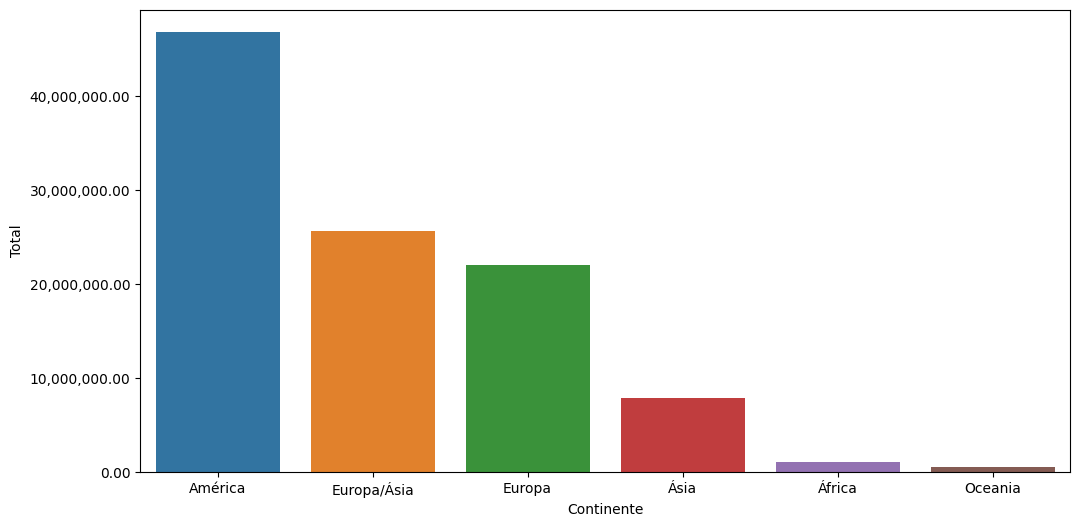

In [86]:
plt.figure(figsize = (12,6))
axis = sns.barplot(data = vendas_por_continente , x = "Continente", y= "Total")
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
#plt.ylim(0,2500000)
plt.xticks()
plt.show()

In [59]:
dados_dolar_ordenados = dados_dolar_combinado.sort_values("Total", axis= 0 , ascending= False)
dados_dolar_ordenados.head()

,Id,País,2007-Dolar,2008-Dolar,2009-Dolar,2010-Dolar,2011-Dolar,2012-Dolar,2013-Dolar,2014-Dolar,2015-Dolar,2016-Dolar,2017-Dolar,2018-Dolar,2019-Dolar,2020-Dolar,2021-Dolar,Total,Continente
70,94,Paraguai,801519,1374088,392087,449197,276281,428279,680828,908028,741370,1655417,4274650,5494321,3826587,3869243,7192362,32364257,América
76,102,Rússia,173160,2352768,5732280,0,0,2103968,14795694,61440,18240,0,0,0,0,8550,312926,25559026,Europa/Ásia
36,48,Estados Unidos,810038,804607,660066,478630,1030254,303986,786556,494216,524109,687411,1523699,512519,616274,610793,203554,10046712,América
74,100,Reino Unido,144244,155076,68788,295690,285642,334856,305005,1373747,308407,536681,242883,296827,164592,82722,122394,4717554,Europa
21,29,China,30390,25926,482400,2358,334867,642177,279956,455340,222866,499622,266086,126336,376828,363000,264116,4372268,Ásia


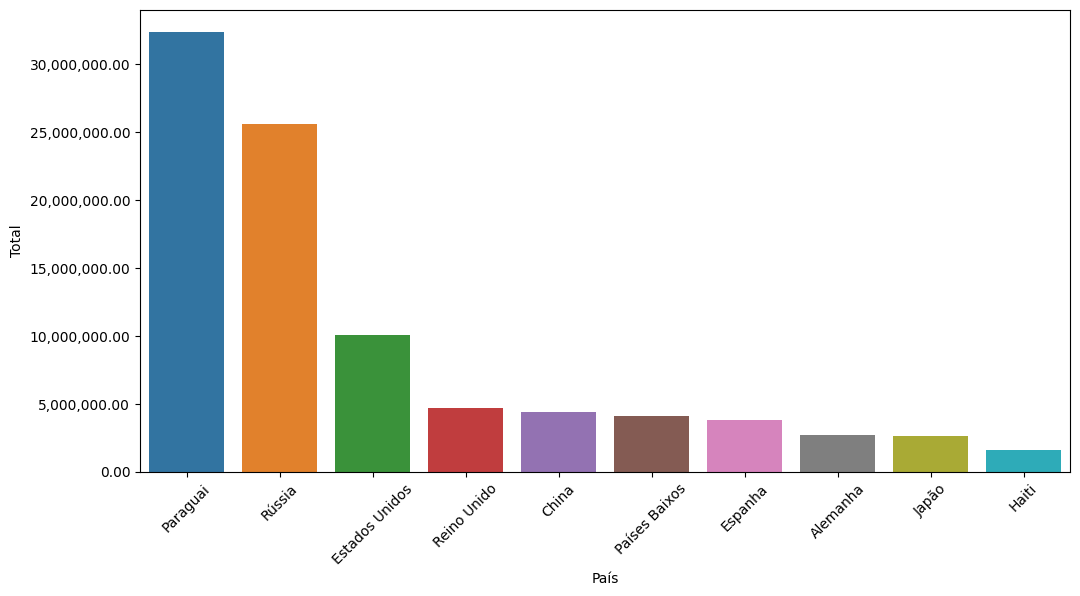

In [60]:
plt.figure(figsize = (12,6))
axis_1 = sns.barplot(data = dados_dolar_ordenados.head(10), x = "País", y = "Total")
plt.xticks(rotation = 45 )
axis_1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))